<a href="https://colab.research.google.com/github/pronsSec/time-series-forecasting-store-sales-template/blob/main/Time_series_sales_comp_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
%%html
<marquee style=’width: 90%; height:70%; color: #0bda11;’>
    <b> Store Sales: Time Series Forecasting</b></marquee>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
import warnings
warnings.filterwarnings('ignore')

In [29]:
store_sales = pd.read_csv('/content/train.csv', usecols=['store_nbr', 'family', 'date', 'sales'],)
store_sales.head().style.set_properties(**{'background-color': 'LavenderBlush'})

,date,store_nbr,family,sales
0,2013-01-01,1,AUTOMOTIVE,0.000000
1,2013-01-01,1,BABY CARE,0.000000
2,2013-01-01,1,BEAUTY,0.000000
3,2013-01-01,1,BEVERAGES,0.000000
4,2013-01-01,1,BOOKS,0.000000


In [30]:
store_sales_test = pd.read_csv('/content/test.csv', usecols=['store_nbr', 'family', 'date', 'id'])
store_sales_test.head().style.set_properties(**{'background-color': 'Lavender'})

,id,date,store_nbr,family
0,3000888,2017-08-16,1,AUTOMOTIVE
1,3000889,2017-08-16,1,BABY CARE
2,3000890,2017-08-16,1,BEAUTY
3,3000891,2017-08-16,1,BEVERAGES
4,3000892,2017-08-16,1,BOOKS


In [31]:
store_sales_test.tail().style.set_properties(**{'background-color': 'Lavender'})

,id,date,store_nbr,family
28507,3029395,2017-08-31,9,POULTRY
28508,3029396,2017-08-31,9,PREPARED FOODS
28509,3029397,2017-08-31,9,PRODUCE
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES
28511,3029399,2017-08-31,9,SEAFOOD


In [32]:
store_sales.info(), store_sales_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   date       object 
 1   store_nbr  int64  
 2   family     object 
 3   sales      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 91.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         28512 non-null  int64 
 1   date       28512 non-null  object
 2   store_nbr  28512 non-null  int64 
 3   family     28512 non-null  object
dtypes: int64(2), object(2)
memory usage: 891.1+ KB


(None, None)

In [33]:
store_sales.isnull().sum(), store_sales_test.isnull().sum()


(date         0
 store_nbr    0
 family       0
 sales        0
 dtype: int64, id           0
 date         0
 store_nbr    0
 family       0
 dtype: int64)

In [34]:
pd.read_csv("/content/sample_submission.csv")

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


# Preprocessing

In [35]:
store_sales['date'] = pd.to_datetime(store_sales['date'])
store_sales['date'] = store_sales.date.dt.to_period('D')
store_sales_test['date'] = pd.to_datetime(store_sales_test['date'])
store_sales_test['date'] = store_sales_test.date.dt.to_period('D')

In [36]:
store_sales = store_sales.set_index(['store_nbr', 'family', 'date']).sort_index()
store_sales_test = store_sales_test.set_index(['store_nbr', 'family', 'date']).sort_index()
store_sales.head(), store_sales_test.head()

(                                 sales
 store_nbr family     date             
 1         AUTOMOTIVE 2013-01-01    0.0
                      2013-01-02    2.0
                      2013-01-03    3.0
                      2013-01-04    3.0
                      2013-01-05    5.0,
                                       id
 store_nbr family     date               
 1         AUTOMOTIVE 2017-08-16  3000888
                      2017-08-17  3002670
                      2017-08-18  3004452
                      2017-08-19  3006234
                      2017-08-20  3008016)

# Determine Seasonality

In [37]:
store_sales.head()

sales
store_nbr family     date             
1         AUTOMOTIVE 2013-01-01    0.0
                     2013-01-02    2.0
                     2013-01-03    3.0
                     2013-01-04    3.0
                     2013-01-05    5.0

In [38]:
Total_sales = store_sales.groupby('date').sum().squeeze().loc['2017']
Total_sales

date
2017-01-01    1.208250e+04
2017-01-02    1.402306e+06
2017-01-03    1.104377e+06
2017-01-04    9.900935e+05
2017-01-05    7.776210e+05
                  ...     
2017-08-11    8.263737e+05
2017-08-12    7.926305e+05
2017-08-13    8.656397e+05
2017-08-14    7.609224e+05
2017-08-15    7.626619e+05
Freq: D, Name: sales, Length: 227, dtype: float64

In [39]:
Total_sales_test = store_sales_test.drop('id', axis = 1).groupby('date').sum().squeeze().loc['2017']
Total_sales_test

""
date
2017-08-16
2017-08-17
2017-08-18
2017-08-19
2017-08-20
2017-08-21
2017-08-22
2017-08-23
2017-08-24


fatal: destination path 'learntools' already exists and is not an empty directory.


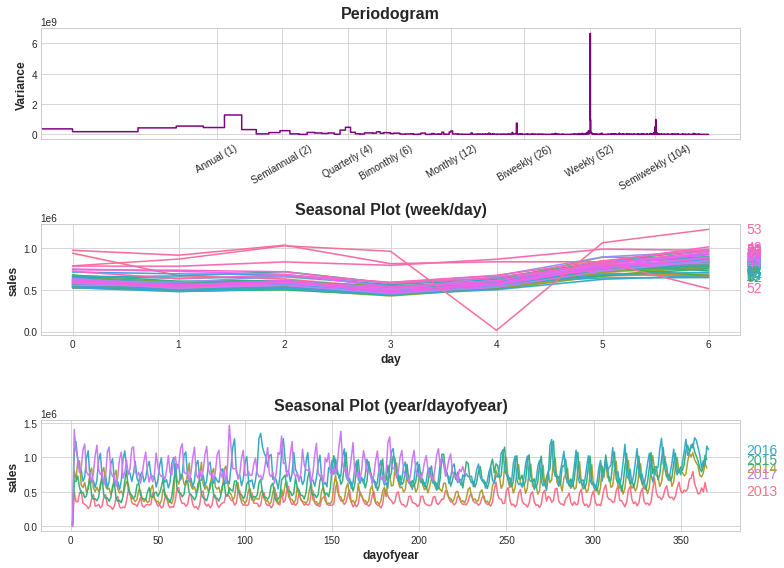

In [40]:
#adding unnecessary kaggle comp stuff..but tbh it does make a nice viz
!git clone https://github.com/Kaggle/learntools.git
!mv learntools learntools_dir
!mv learntools_dir/learntools learntools
from learntools.deep_learning import decode_predictions


fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(11, 8))

Total_sales = (store_sales.groupby('date').sum().squeeze())
from learntools.time_series.utils import plot_periodogram, seasonal_plot
plot_periodogram(Total_sales, ax=ax0);

X = Total_sales.to_frame()
X["week"] = X.index.week
X["day"] = X.index.dayofweek
# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
seasonal_plot(X, y='sales', period='week', freq='day', ax=ax1);
seasonal_plot(X, y="sales", period="year", freq="dayofyear", ax=ax2);
plt.tight_layout();

Periodogram and seasonal plot for 2017

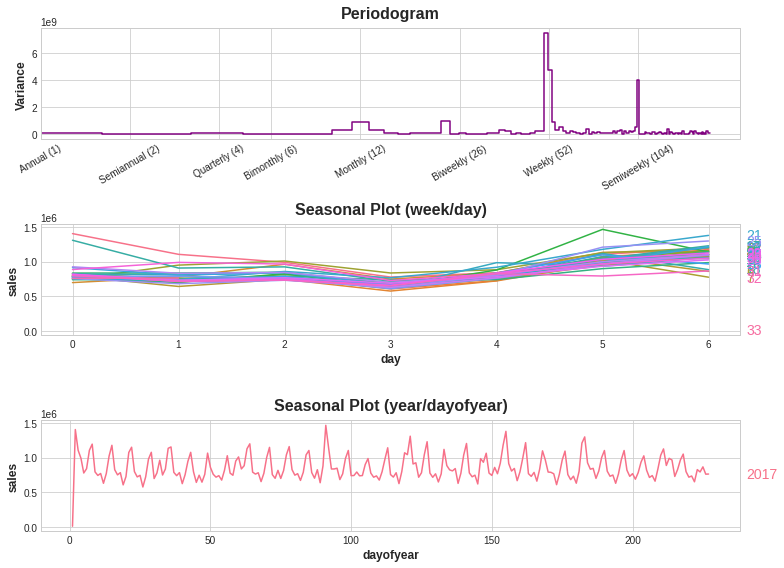

In [41]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(11, 8))

Total_sales = (store_sales.groupby('date').sum().squeeze().loc['2017'])
from learntools.time_series.utils import plot_periodogram, seasonal_plot
plot_periodogram(Total_sales, ax=ax0);

X = Total_sales.to_frame()
X["week"] = X.index.week
X["day"] = X.index.dayofweek
# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
seasonal_plot(X, y='sales', period='week', freq='day', ax=ax1);
seasonal_plot(X, y="sales", period="year", freq="dayofyear", ax=ax2);
plt.tight_layout();

# Create seasonal features

In [42]:
Total_sales

date
2017-01-01    1.208250e+04
2017-01-02    1.402306e+06
2017-01-03    1.104377e+06
2017-01-04    9.900935e+05
2017-01-05    7.776210e+05
                  ...     
2017-08-11    8.263737e+05
2017-08-12    7.926305e+05
2017-08-13    8.656397e+05
2017-08-14    7.609224e+05
2017-08-15    7.626619e+05
Freq: D, Name: sales, Length: 227, dtype: float64

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


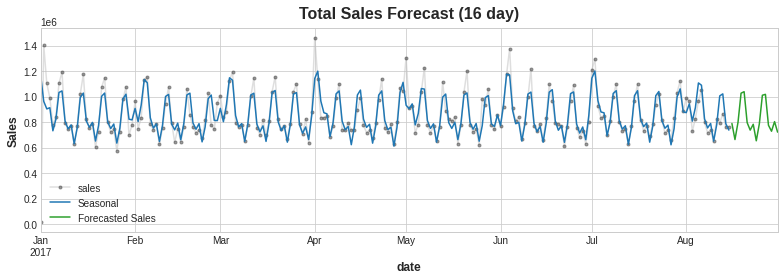

In [43]:
y = Total_sales.copy()
!pip install --upgrade --no-deps statsmodels

from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
fourier = CalendarFourier(freq="M", order=4)  # 4 sin/cos pairs for "M"onthly seasonality

dp = DeterministicProcess(
    index=y.index,
    constant=True,
    order=1,
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # Monthly seasonality (fourier)
    drop=True,
)
X = dp.in_sample()  # create features for dates in average_sales.index

# Now fit the seasonal model.
# With our feature set created, we're ready to fit the model and make predictions. 
# We'll add a 16-day forecast to see how our model extrapolates beyond the training data. 
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
X_fore = dp.out_of_sample(steps=16)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)
from learntools.time_series.style import *
ax = y.plot(**plot_params, alpha=0.5, title="Total Sales Forecast (16 day)", ylabel="Sales")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Forecasted Sales", color='C2')
ax.legend();

# Create seasonal model for the dataset

In [44]:
store_sales.unstack(['store_nbr', 'family'])

sales                                                \
store_nbr          1                                                  
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                  
2013-01-01        0.0       0.0    0.0       0.0   0.0      0.00000   
2013-01-02        2.0       0.0    2.0    1091.0   0.0    470.65200   
2013-01-03        3.0       0.0    0.0     919.0   0.0    310.65500   
2013-01-04        3.0       0.0    3.0     953.0   0.0    198.36600   
2013-01-05        5.0       0.0    3.0    1160.0   0.0    301.05700   
...               ...       ...    ...       ...   ...          ...   
2017-08-11        1.0       0.0    1.0    1006.0   0.0    145.60700   
2017-08-12        6.0       0.0    3.0    1659.0   0.0    243.22000   
2017-08-13        1.0       0.0    1.0     803.0   0.0    136.67900   
2017-08-14        1.0       0.0    6.0    2201.0   0.0    346.03800   
2017-08-15        4.0       0.0    4.0    1942.0   0.0    329.54102   

                                                 ...                       \
store_nbr                                        ...        54              
family     CELEBRATION CLEANING  DAIRY     DELI  ... MAGAZINES      MEATS   
date                                             ...                        
2013-01-01         0.0      0.0    0.0    0.000  ...       0.0   0.000000   
2013-01-02         0.0   1060.0  579.0  164.069  ...       0.0  73.771000   
2013-01-03         0.0    836.0  453.0  151.582  ...       0.0  50.257000   
2013-01-04         0.0    827.0  460.0  131.411  ...       0.0  40.223000   
2013-01-05         0.0    811.0  464.0  118.613  ...       0.0  43.431000   
...                ...      ...    ...      ...  ...       ...        ...   
2017-08-11         4.0    341.0  343.0   64.302  ...       0.0  50.756000   
2017-08-12         3.0    351.0  526.0   99.488  ...       1.0  53.079002   
2017-08-13         1.0    169.0  266.0   47.770  ...       3.0  67.435000   
2017-08-14         4.0    571.0  699.0  154.578  ...       1.0  64.224000   
2017-08-15        21.0    703.0  602.0  116.402  ...       2.0  57.842000   

                                                                          \
store_nbr                                                                  
family     PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS    POULTRY   
date                                                                       
2013-01-01           0.0          0.0                     0.0   0.000000   
2013-01-02         228.0          0.0                     0.0  15.514000   
2013-01-03         156.0          0.0                     0.0   4.313000   
2013-01-04         146.0          0.0                     0.0  26.743000   
2013-01-05         205.0          0.0                     0.0  31.118000   
...                  ...          ...                     ...        ...   
2017-08-11         155.0          0.0                     0.0  80.759000   
2017-08-12         169.0          0.0                     4.0  91.671000   
2017-08-13         244.0          0.0                     2.0  79.062996   
2017-08-14         200.0          0.0                     1.0  56.155000   
2017-08-15         169.0          0.0                     2.0  59.619000   

                                                                       
store_nbr                                                              
family     PREPARED FOODS  PRODUCE SCHOOL AND OFFICE SUPPLIES SEAFOOD  
date                                                                   
2013-01-01            0.0    0.000                        0.0     0.0  
2013-01-02           61.0    0.000                        0.0     3.0  
2013-01-03            1.0    0.000                        0.0     2.0  
2013-01-04           38.0    0.000                        0.0     2.0  
2013-01-05           32.0    0.000                        0.0     1.0  
...  

**ARIMA MODEL**

predicted=754018.331581, expected=742471.276991
predicted=683514.025876, expected=858062.149411
predicted=970996.335970, expected=766859.172845
predicted=774890.866183, expected=918421.319125
predicted=1039182.720554, expected=1176138.109152
predicted=1006267.869567, expected=1376511.520495
predicted=1034991.962986, expected=912693.851100
predicted=795227.462819, expected=805546.647956
predicted=863184.685441, expected=842979.837082
predicted=920087.895581, expected=667099.801025
predicted=817375.316487, expected=795116.136070
predicted=1154316.340935, expected=993732.684049
predicted=976938.188122, expected=1213673.946877
predicted=995593.620808, expected=768349.758952
predicted=724263.835016, expected=729412.959849
predicted=775150.059983, expected=785885.908896
predicted=825548.115287, expected=660338.346974
predicted=726353.416351, expected=834786.427555
predicted=1096490.186481, expected=1096133.550886
predicted=957414.399062, expected=965144.121179
predicted=766805.773171, expect

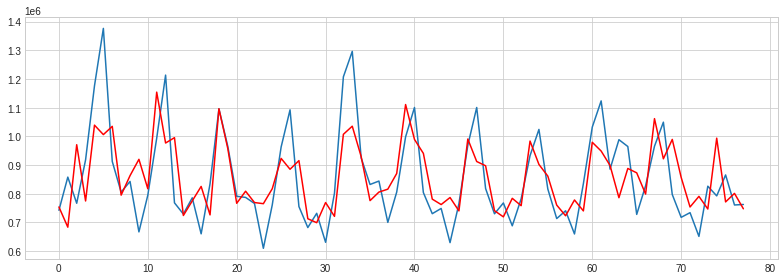

In [45]:
X = Total_sales.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
from statsmodels.tsa.arima.model import ARIMA
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

**Deterministic with CalendarFourier**

In [46]:
y = store_sales.unstack(['store_nbr', 'family']).loc["2017"]
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
# Create training data
fourier = CalendarFourier(freq='M', order=4) # 4 sin/cos pairs for "M"onthly seasonality
dp = DeterministicProcess(
    index=y.index,
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)
X = dp.in_sample()

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_pred = pd.DataFrame(model.predict(X), index=X.index, columns=y.columns)
print(y_pred)

                sales                                                          \
store_nbr          1                                                            
family     AUTOMOTIVE BABY CARE    BEAUTY    BEVERAGES     BOOKS BREAD/BAKERY   
date                                                                            
2017-01-01   1.765397       0.0  1.878898  1070.645255  0.560145   187.388222   
2017-01-02   4.079200       0.0  3.609793  2390.697187  0.627466   425.536102   
2017-01-03   3.967442       0.0  3.735080  2525.305827  0.965860   421.781147   
2017-01-04   4.065468       0.0  3.603507  2709.553597  1.063590   497.962041   
2017-01-05   3.925240       0.0  3.107353  2341.551931  0.787991   442.750780   
...               ...       ...       ...          ...       ...          ...   
2017-08-11   6.255772       0.0  3.618540  2285.313096  0.433766   351.545105   
2017-08-12   5.373726       0.0  4.278236  2426.128017  0.197833   369.023064   
2017-08-13   2.488187       

**Deterministic with Fourier**

In [47]:
y = store_sales.unstack(['store_nbr', 'family']).loc["2017"]
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from statsmodels.tsa.deterministic import Fourier

# Create training data
fourier = Fourier(period = 30, order=1)  
dp = DeterministicProcess(
    index=y.index,
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)
X = dp.in_sample()

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_pred = pd.DataFrame(model.predict(X), index=X.index, columns=y.columns)

# Create csv for submission

In [48]:
# Create features for test set
X_test = dp.out_of_sample(steps=16)
X_test.index.name = 'date'

y_submit = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)
y_submit = y_submit.stack(['store_nbr', 'family'])
y_submit = y_submit.join(store_sales_test.id).reindex(columns=['id', 'sales'])
y_submit.to_csv('submission.csv', index=False)